# Trabajo de Fin de Grado

## Predicción de eventos cardiovasculares y hemorrágicos en pacientes con doble antiagregación con modelos machine learning.

##### Pablo Pérez Sánchez
---

# 0_ExploreData  

1. **Descriptivo de las variables**
    1. Variable categoricas:
        - Porcentajes.
        - Gráficos de barras.
    2. Variables continuas:
        - Histogramas  
        
        
2. **Tiempos**: Totales sobre las variables: Months_Death, Months_reAMI, Months_Bleeding y LengthDapt_months.
    1. Tiempo absoluto
    2. Diferencia con respecto al tiempo de medicación
    

3. **Curvas de supervivencia**


4. **Tablas de frequencias**

In [1]:
# Import librarys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from datetime import date, datetime
from sksurv.nonparametric import kaplan_meier_estimator

pd.options.display.max_columns = None

%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Pablo\Anaconda3\envs\survival\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
# Import data

df = pd.read_excel('../../data/PACS_DAPT_completo.xlsx')

# 1. Descriptivo de las variables

In [3]:
# df.head()

In [4]:
print("Pacientes en el registro BleeMACS: ", df.loc[(df['Registro']=='BLEEMACS'),].shape[0],
      "\nPacientes en el registro RENAMI: ", df.loc[(df['Registro']=='RENAMI'),].shape[0],
      "\nPacientes en el registro Vigo_Arritxaca: ", df.loc[(df['Registro']=='Vigo_Arritxaca'),].shape[0])

Pacientes en el registro BleeMACS:  15364 
Pacientes en el registro RENAMI:  4422 
Pacientes en el registro Vigo_Arritxaca:  6290


In [5]:
df.columns

Index(['Id', 'Registro', 'Year', 'Continent', 'Country', 'Age', 'Sex', 'Peso',
       'Talla', 'Diabetes', 'Hypertension', 'Dyslipemia',
       'PeripheralArteryDisease', 'PriorMyocardialInfarction', 'PriorPCI',
       'PriorCABG', 'PriorStroke', 'Cancer', 'Prior_Bleeding', 'STEMI',
       'UnstableAngina', 'Killip2orMore', 'LVEFless40', 'LVEFgroups',
       'Hemoglobin_Admission', 'Creatinine_Admission', 'Femoral_Access',
       'Multivessel', 'DrugElutingStent', 'NoStent',
       'Revascularization_Complete', 'ReAMI_inhospital', 'Bleeding_inhospital',
       'Transfusion_IH', 'Clopidogrel', 'Ticagrelor', 'Prasugrel',
       'OralAnticoagulation', 'Betablockers', 'ACEI_ARB', 'Statin', 'Death',
       'Months_Death', 'ReInfarction', 'Months_reAMI', 'Bleeding',
       'Months_Bleeding', 'Transfusion', 'LengthDapt_months'],
      dtype='object')

## A. Variables categoricas

In [6]:
var_cat = ['Sex', 'Diabetes', 'Hypertension', 'Dyslipemia', 'PeripheralArteryDisease', 'PriorMyocardialInfarction',
           'PriorPCI','PriorCABG', 'PriorStroke', 'Cancer', 'Prior_Bleeding', 'STEMI', 'UnstableAngina',
           'Killip2orMore', 'LVEFless40', 'LVEFgroups', 'Femoral_Access', 'Multivessel', 'DrugElutingStent',
           'NoStent','Revascularization_Complete', 'ReAMI_inhospital', 'Bleeding_inhospital', 'Transfusion_IH',
           'Clopidogrel', 'Ticagrelor', 'Prasugrel', 'OralAnticoagulation', 'Betablockers', 'ACEI_ARB', 'Statin',
           'Death', 'ReInfarction', 'Bleeding', 'Transfusion']

### - Porcentajes

In [7]:
for el in var_cat:
    print(df[el].value_counts(normalize=True) * 100,
          '\n-----------------------------------------------------------\n')

Male      76.641356
Female    23.358644
Name: Sex, dtype: float64 
-----------------------------------------------------------

No     73.274275
Yes    26.725725
Name: Diabetes, dtype: float64 
-----------------------------------------------------------

Yes    59.93634
No     40.06366
Name: Hypertension, dtype: float64 
-----------------------------------------------------------

Yes    56.017027
No     43.982973
Name: Dyslipemia, dtype: float64 
-----------------------------------------------------------

No     93.86409
Yes     6.13591
Name: PeripheralArteryDisease, dtype: float64 
-----------------------------------------------------------

No     82.324743
Yes    17.675257
Name: PriorMyocardialInfarction, dtype: float64 
-----------------------------------------------------------

No     84.295904
Yes    15.704096
Name: PriorPCI, dtype: float64 
-----------------------------------------------------------

No     96.751802
Yes     3.248198
Name: PriorCABG, dtype: float64 
---------

In [8]:
for el in var_cat:
    print(df.groupby('Registro')[el].value_counts(normalize=True) * 100,
          '\n-----------------------------------------------------------\n')

Registro        Sex   
BLEEMACS        Male      76.724811
                Female    23.275189
RENAMI          Male      79.172320
                Female    20.827680
Vigo_Arritxaca  Male      74.658188
                Female    25.341812
Name: Sex, dtype: float64 
-----------------------------------------------------------

Registro        Diabetes
BLEEMACS        No          75.989326
                Yes         24.010674
RENAMI          No          70.104025
                Yes         29.895975
Vigo_Arritxaca  No          68.871224
                Yes         31.128776
Name: Diabetes, dtype: float64 
-----------------------------------------------------------

Registro        Hypertension
BLEEMACS        Yes             58.682635
                No              41.317365
RENAMI          Yes             54.002714
                No              45.997286
Vigo_Arritxaca  Yes             67.170111
                No              32.829889
Name: Hypertension, dtype: float64 
----------

Name: OralAnticoagulation, dtype: float64 
-----------------------------------------------------------

Registro        Betablockers
BLEEMACS        Yes             80.975007
                No              19.024993
RENAMI          Yes             95.251018
                No               4.748982
Vigo_Arritxaca  Yes             83.910970
                No              16.089030
Name: Betablockers, dtype: float64 
-----------------------------------------------------------

Registro        ACEI_ARB
BLEEMACS        Yes         75.481645
                No          24.518355
RENAMI          Yes         92.356400
                No           7.643600
Vigo_Arritxaca  Yes         73.879173
                No          26.120827
Name: ACEI_ARB, dtype: float64 
-----------------------------------------------------------

Registro        Statin
BLEEMACS        Yes       93.061703
                No         6.938297
RENAMI          Yes       99.298960
                No         0.701040
Vigo_

### - Gráficos de barras

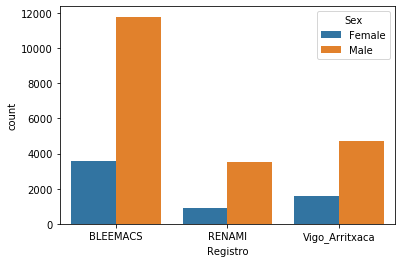

In [9]:
hue = "Sex"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

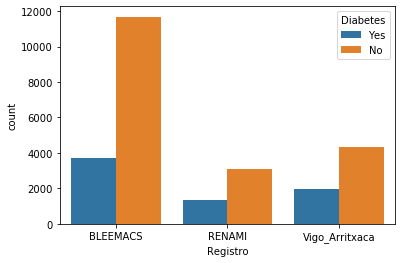

In [10]:
hue = "Diabetes"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

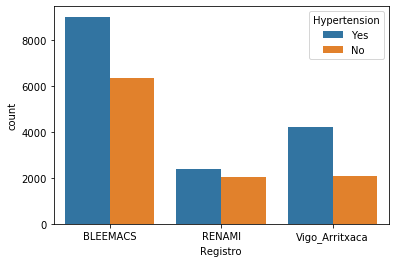

In [11]:
hue = "Hypertension"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

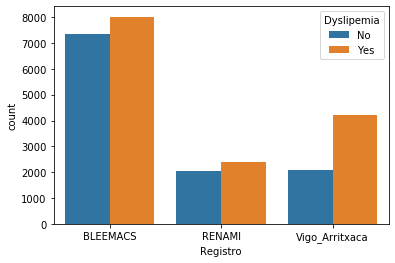

In [12]:
hue = "Dyslipemia"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

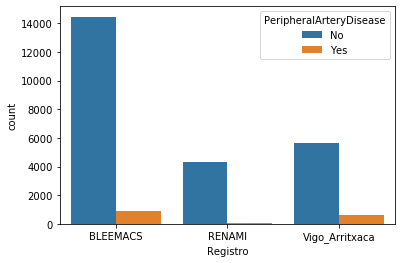

In [13]:
hue = "PeripheralArteryDisease"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

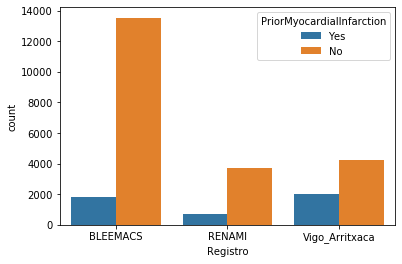

In [14]:
hue = "PriorMyocardialInfarction"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

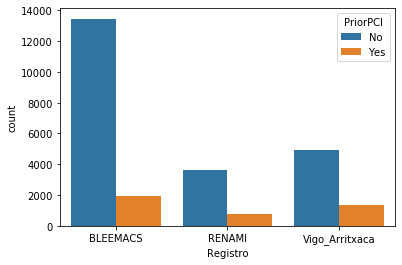

In [15]:
hue = "PriorPCI"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

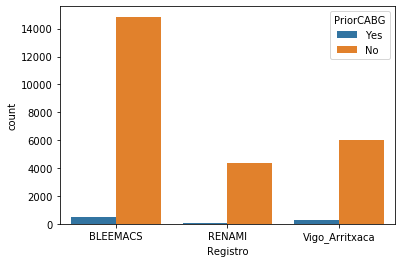

In [16]:
hue = "PriorCABG"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

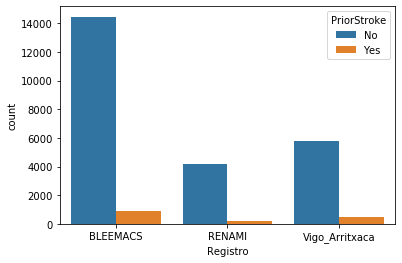

In [17]:
hue = "PriorStroke"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

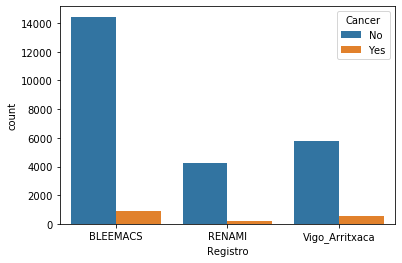

In [18]:
hue = "Cancer"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

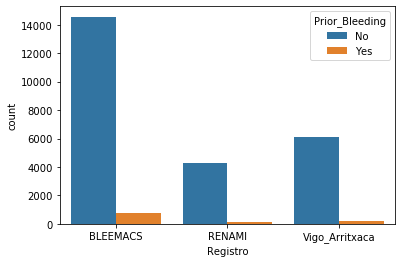

In [19]:
hue = "Prior_Bleeding"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

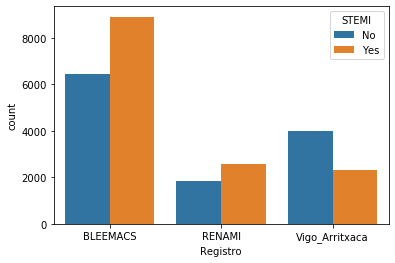

In [20]:
hue = "STEMI"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

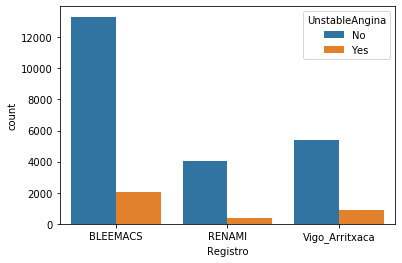

In [21]:
hue = "UnstableAngina"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

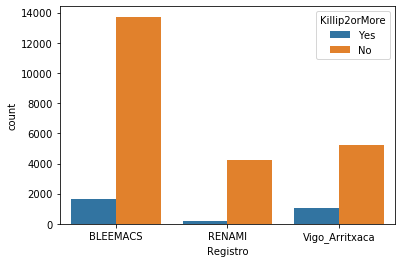

In [22]:
hue = "Killip2orMore"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

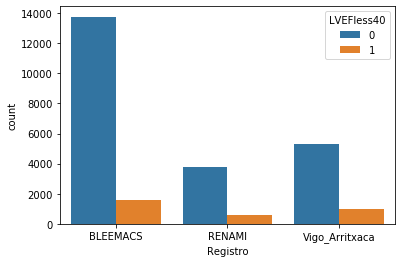

In [23]:
hue = "LVEFless40"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

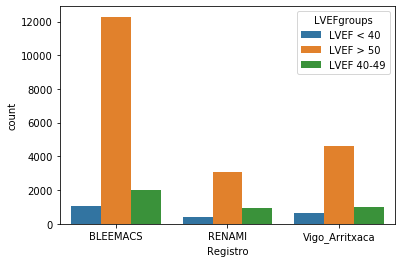

In [24]:
hue = "LVEFgroups"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

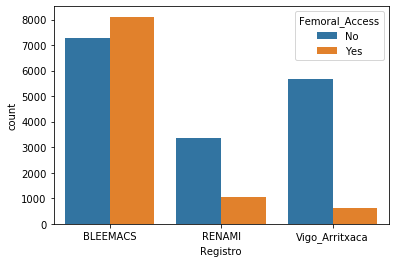

In [25]:
hue = "Femoral_Access"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

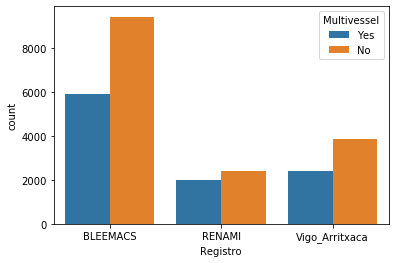

In [26]:
hue = "Multivessel"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

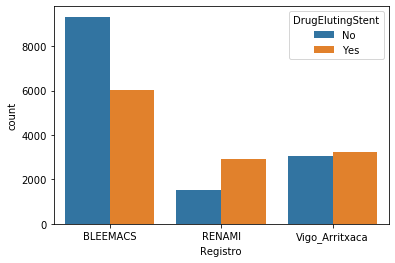

In [27]:
hue = "DrugElutingStent"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

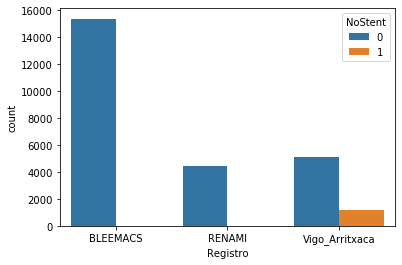

In [28]:
hue = "NoStent"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

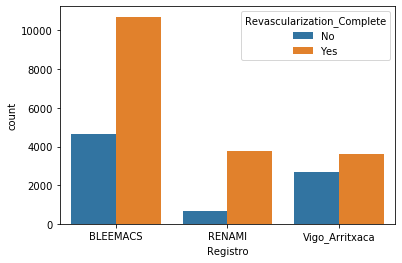

In [29]:
hue = "Revascularization_Complete"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

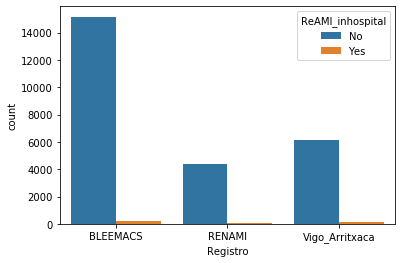

In [30]:
hue = "ReAMI_inhospital"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

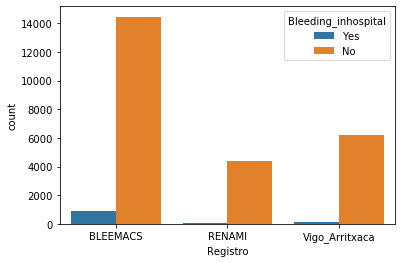

In [31]:
hue = "Bleeding_inhospital"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

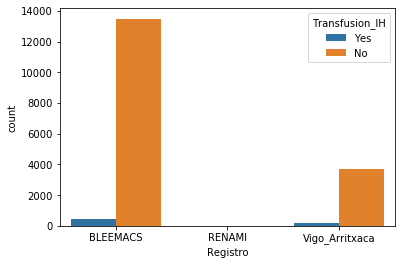

In [32]:
hue = "Transfusion_IH"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

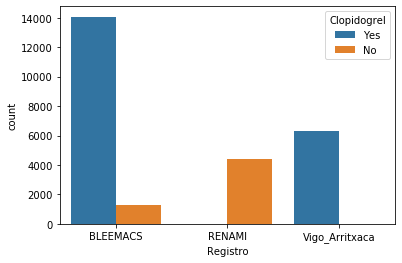

In [33]:
hue = "Clopidogrel"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

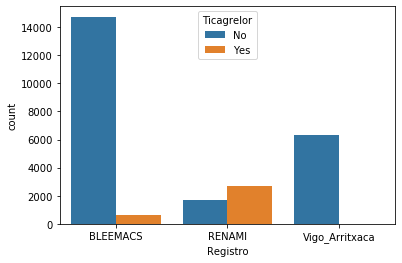

In [34]:
hue = "Ticagrelor"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

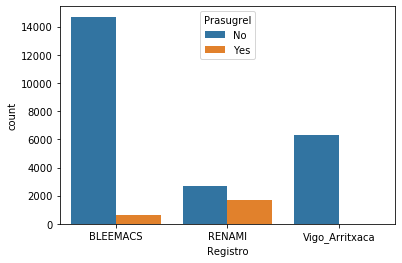

In [35]:
hue = "Prasugrel"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

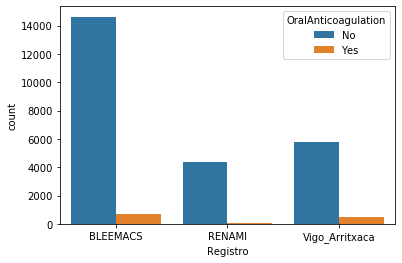

In [36]:
hue = "OralAnticoagulation"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

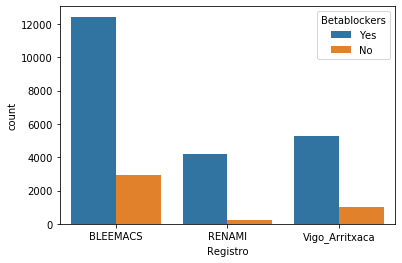

In [37]:
hue = "Betablockers"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

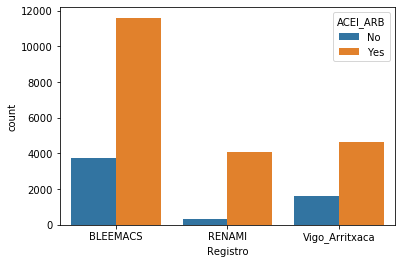

In [38]:
hue = "ACEI_ARB"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

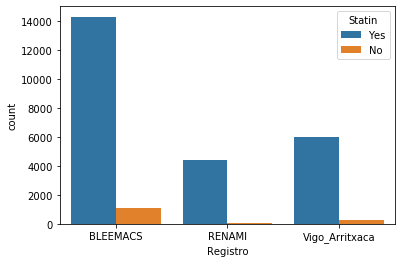

In [39]:
hue = "Statin"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

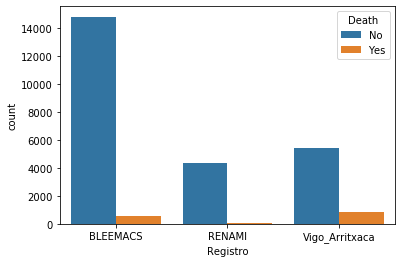

In [40]:
hue = "Death"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

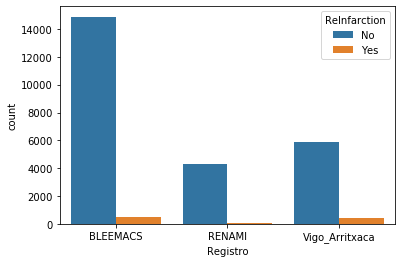

In [41]:
hue = "ReInfarction"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

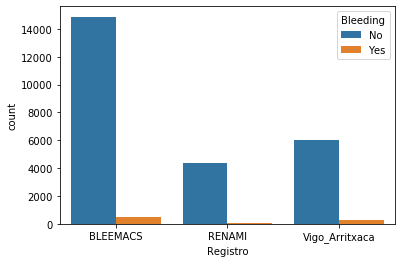

In [42]:
hue = "Bleeding"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

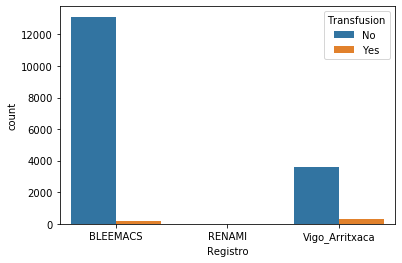

In [43]:
hue = "Transfusion"
sns_plot = sns.countplot(x="Registro", hue=hue,data=df)
# sns_plot.figure.savefig(str('BarPlot_' + hue +'.png'))

---
## B. Variables continuas

In [44]:
var_cont = ['Year', 'Age', 'Peso', 'Talla', 'Hemoglobin_Admission', 'Creatinine_Admission', 'Months_Death',
            'Months_reAMI', 'Months_Bleeding', 'LengthDapt_months']

### - Histogramas

In [45]:
def histograma(variable, n_bins, registro = ['BLEEMACS', 'RENAMI', 'Vigo_Arritxaca']):
    fig = plt.figure(tight_layout=True, figsize= (10,5))
    gs = gridspec.GridSpec(2, len(registro))
    i =  0
    ax = fig.add_subplot(gs[0,:])
    sns.distplot(df[variable], bins=n_bins, rug=True, kde=False, ax= ax)
    ax.set_title(variable +' -- TOTAL')
    # ax.set_ylabel('YLabel0')
    # ax.set_xlabel('XLabel0')
    for reg in registro:
        ax = fig.add_subplot(gs[1, i])
        sns.distplot(df.loc[df['Registro'] == str(reg), variable], bins=n_bins, rug=True, kde=False, ax= ax)
        ax.set_title(variable +' -- ' +reg)
    #     ax.set_ylabel('YLabel1 %d' % i)
    #     ax.set_xlabel('XLabel1 %d' % i)
        i = i+1
        if i == 0:
            for tick in ax.get_xticklabels():
                tick.set_rotation(55)
    fig.align_labels()  # same as fig.align_xlabels(); fig.align_ylabels()
    fig.savefig(str('HistPlot_' + variable +'.png'))

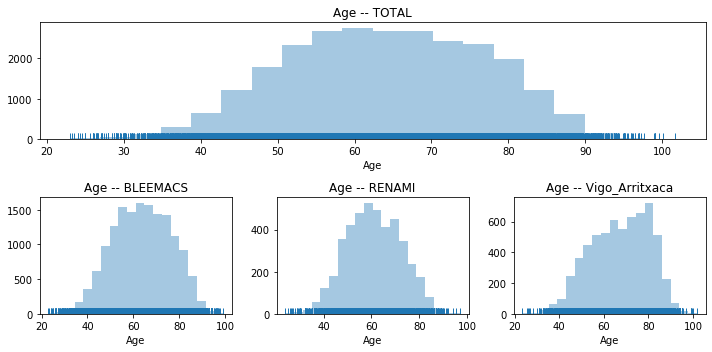

In [46]:
histograma('Age',20)

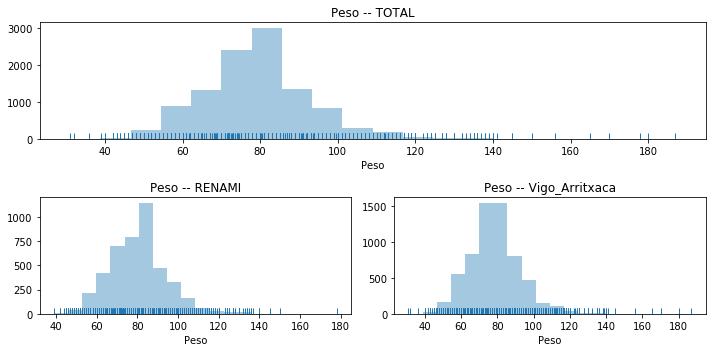

In [47]:
histograma('Peso', 20, ['RENAMI', 'Vigo_Arritxaca'])

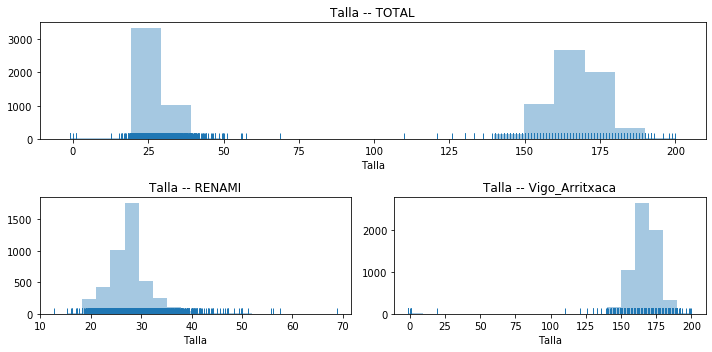

In [48]:
histograma('Talla', 20, ['RENAMI', 'Vigo_Arritxaca'])

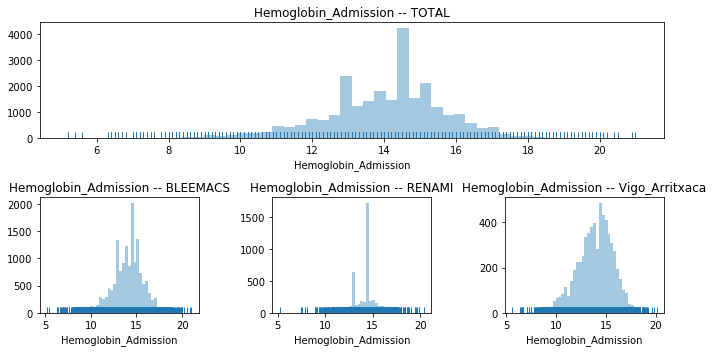

In [49]:
histograma('Hemoglobin_Admission', 50)

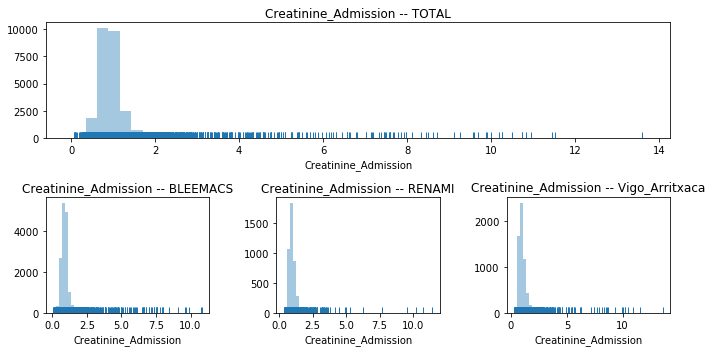

In [50]:
histograma('Creatinine_Admission', 50)

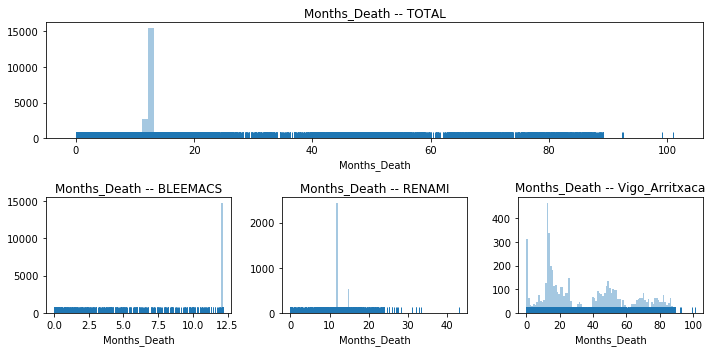

In [51]:
histograma('Months_Death', 100)

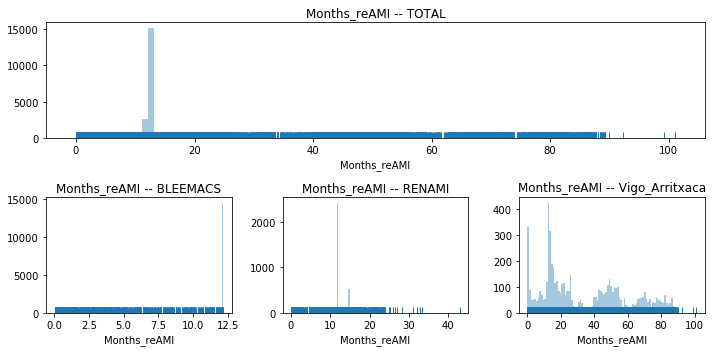

In [52]:
histograma('Months_reAMI', 100)

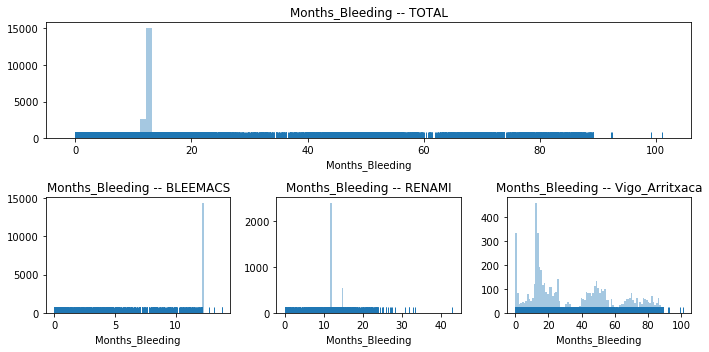

In [53]:
histograma('Months_Bleeding', 100)

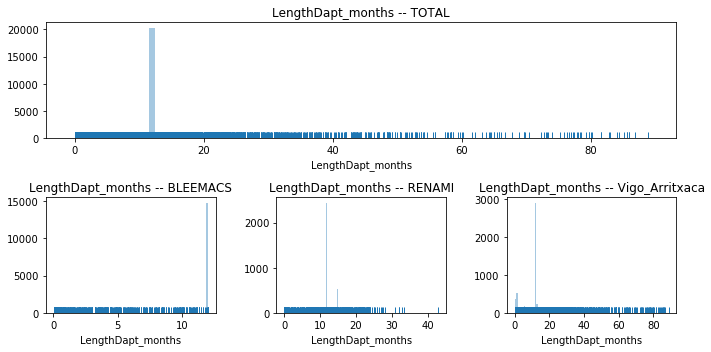

In [54]:
histograma('LengthDapt_months', 100)

---
---
# 2. Tiempos totales
#### Variables: Months_Death, Months_reAMI, Months_Bleeding y LengthDapt_months.


## A. Tiempo absoluto

In [55]:
def tiempos(variable, n_bins1=100, n_bins2=500, xlim = [9,15]):
    fig, (ax1, ax2) = plt.subplots(1 ,2, figsize= (15,5))
    fig.suptitle(variable.name)
    sns.distplot(variable, bins=n_bins1, rug=False, kde=False, ax= ax1)
#     ax1.hist(variable, bins=n_bins1)
    sns.distplot(variable, bins=n_bins2, rug=False, kde=False, ax= ax2)
#     ax2.hist(variable, bins=n_bins2)
    ax2.set_xlim(xlim)

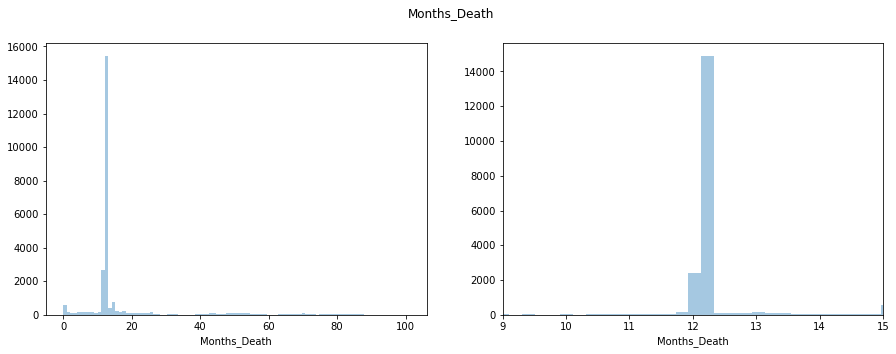

In [56]:
tiempos(df['Months_Death'])

Months_Death con muerte = SI


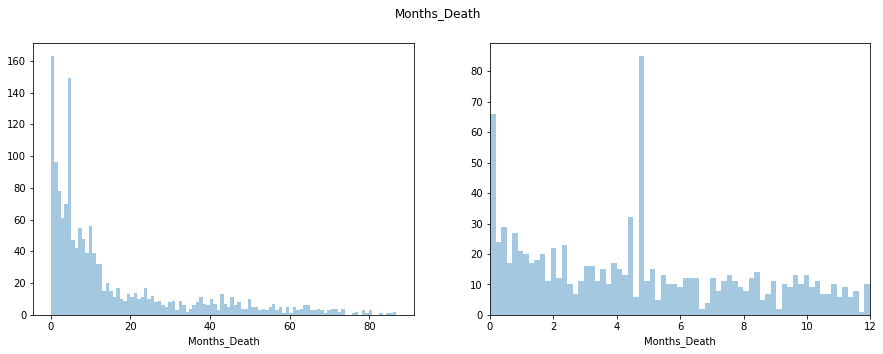

In [57]:
print('Months_Death con muerte = SI')
tiempos(df.loc[df['Death'] == 'Yes', 'Months_Death'], xlim =[0,12])

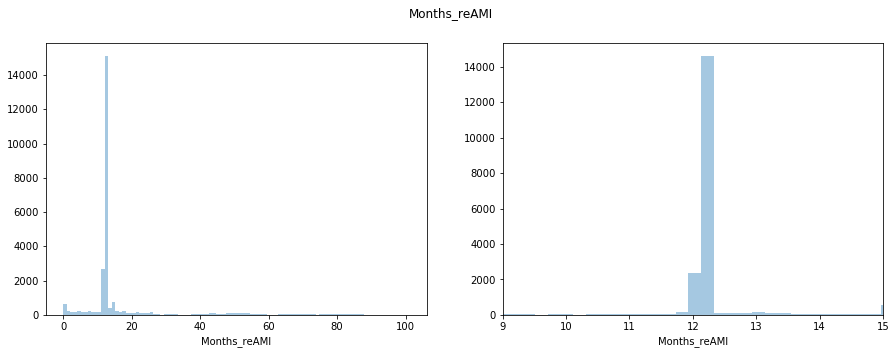

In [58]:
tiempos(df['Months_reAMI'])

Months_reAMI con ReInfarction = SI


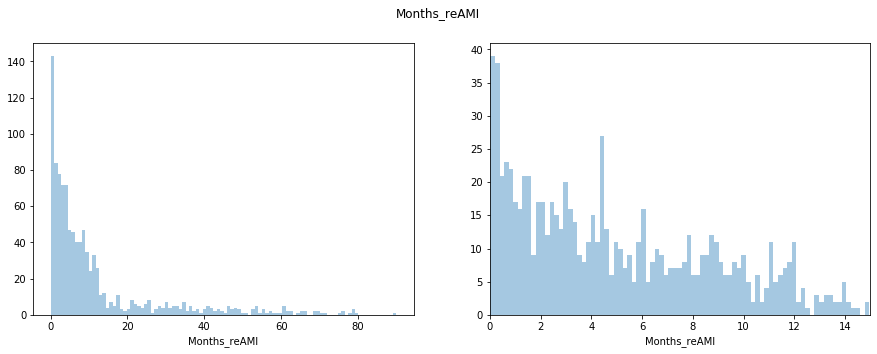

In [59]:
print('Months_reAMI con ReInfarction = SI')
tiempos(df.loc[df['ReInfarction'] == 'Yes', 'Months_reAMI'], xlim =[0,15])

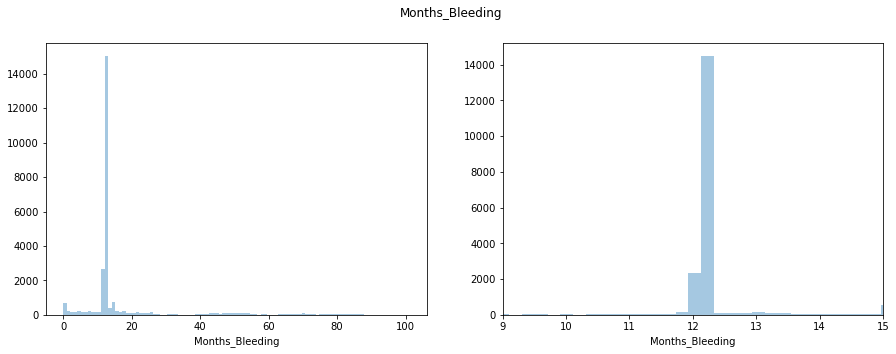

In [60]:
tiempos(df['Months_Bleeding'])

Months_Bleeding con Bleeding = SI


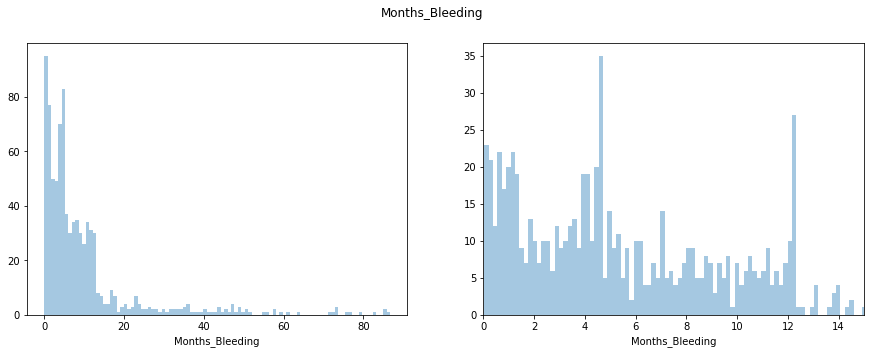

In [61]:
print('Months_Bleeding con Bleeding = SI')
tiempos(df.loc[df['Bleeding'] == 'Yes', 'Months_Bleeding'], xlim =[0,15])

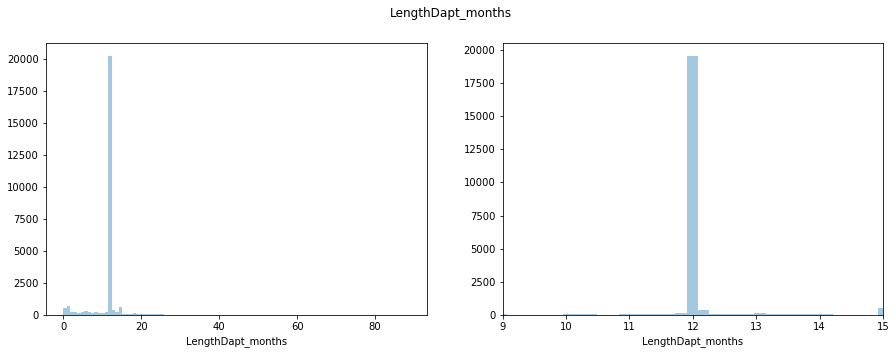

In [62]:
tiempos(df['LengthDapt_months'])

---
## B. Diferencia con respecto al tiempo de medicación

In [63]:
def diferencia(save,title, variable, n_bins1=100, n_bins2=1000, xlim = [-0.5,1.5]):
    fig, (ax1, ax2) = plt.subplots(1 ,2, figsize= (15,5))
    fig.suptitle(title)
    sns.distplot(variable, bins=n_bins1, rug=False, kde=False, ax= ax1)
    sns.distplot(variable, bins=n_bins2, rug=False, kde=False, ax= ax2)
    ax2.set_xlim(xlim)
#     fig.savefig(str('HistPlot_' + save +'.png'))

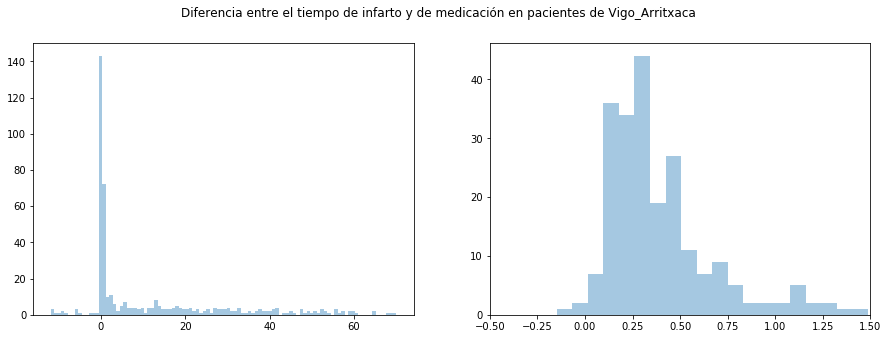

In [64]:
diferencia('difREAMI',
    'Diferencia entre el tiempo de infarto y de medicación en pacientes de Vigo_Arritxaca',
    df.loc[(df['Registro']=='Vigo_Arritxaca') & (df['ReInfarction'] == 'Yes'), 'Months_reAMI'] - df.loc[(df['Registro']=='Vigo_Arritxaca') & (df['ReInfarction'] == 'Yes'), 'LengthDapt_months'])

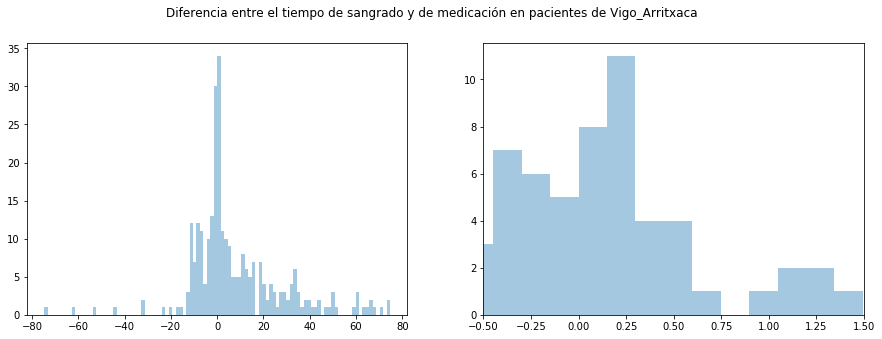

In [65]:
diferencia('DifBLEEDING',
    'Diferencia entre el tiempo de sangrado y de medicación en pacientes de Vigo_Arritxaca',
    df.loc[(df['Registro']=='Vigo_Arritxaca') & (df['Bleeding'] == 'Yes'), 'Months_Bleeding'] - df.loc[(df['Registro']=='Vigo_Arritxaca') & (df['Bleeding'] == 'Yes'), 'LengthDapt_months'])

---
---
# 3. Curvas de supervivencia

In [66]:
#variables que es necesario realizar el cambio

replace_vars = ['ReInfarction','Bleeding', 'Transfusion', 'Death']

#creamos un diccionario con los cambios
dic = {'Yes': np.True_, 'No': np.False_, np.nan:np.nan,'NaN':np.nan, 1:1, 0:0}

#Realizamos el cambio
for i in replace_vars:
    #print(i)
    df[i] = df[i].apply(lambda x:dic[x])

Text(0.5, 0, 'time $t$')

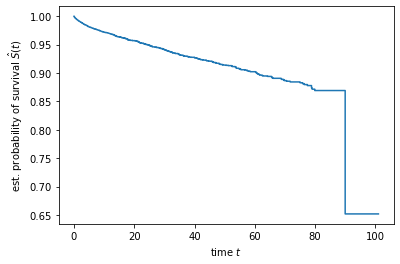

In [67]:
time, survival_prob = kaplan_meier_estimator(df["ReInfarction"], df["Months_reAMI"])
plt.step(time, survival_prob, where="post", label = 'Reinfarto')
# plt.xlim([0,12])
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

In [68]:
df.loc[(df.Months_reAMI >=90),['Registro','ReInfarction','Months_reAMI']]

,Registro,ReInfarction,Months_reAMI
19821,Vigo_Arritxaca,True,90.00
19850,Vigo_Arritxaca,False,92.33
25015,Vigo_Arritxaca,False,101.03
25025,Vigo_Arritxaca,False,99.13


Text(0.5, 0, 'time $t$')

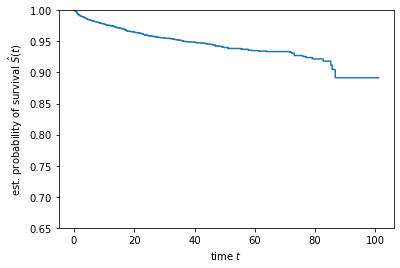

In [69]:
time, survival_prob = kaplan_meier_estimator(df.loc[df.Registro == "Vigo_Arritxaca","Bleeding"], df.loc[df.Registro == "Vigo_Arritxaca","Months_Bleeding"])
plt.step(time, survival_prob, where="post")
plt.ylim([.65,1])
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

In [70]:
df.loc[(df.Bleeding == True)&(df.Months_Bleeding >=70),['Registro','Bleeding','Months_Bleeding']]

,Registro,Bleeding,Months_Bleeding
19899,Vigo_Arritxaca,True,72.17
19941,Vigo_Arritxaca,True,86.70
20134,Vigo_Arritxaca,True,85.23
20241,Vigo_Arritxaca,True,73.10
20313,Vigo_Arritxaca,True,85.67
20343,Vigo_Arritxaca,True,77.00
20649,Vigo_Arritxaca,True,82.67
20990,Vigo_Arritxaca,True,79.10
21019,Vigo_Arritxaca,True,75.93
21185,Vigo_Arritxaca,True,73.10


Text(0.5, 0, 'time $t$')

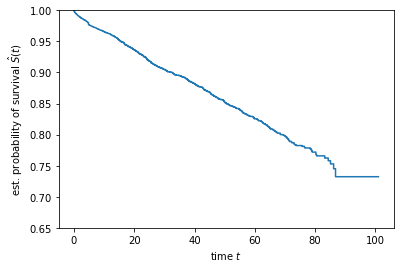

In [71]:
time, survival_prob = kaplan_meier_estimator(df["Death"], df["Months_Death"])
plt.step(time, survival_prob, where="post", label = 'Fallecimiento')
plt.ylim([.65,1])
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

In [72]:
df.loc[(df.Bleeding == True)&(df.Months_Bleeding >=70),['Registro','Death','Months_Death']]

,Registro,Death,Months_Death
19899,Vigo_Arritxaca,False,73.77
19941,Vigo_Arritxaca,True,86.80
20134,Vigo_Arritxaca,True,85.13
20241,Vigo_Arritxaca,True,86.17
20313,Vigo_Arritxaca,False,12.50
20343,Vigo_Arritxaca,False,81.20
20649,Vigo_Arritxaca,False,82.67
20990,Vigo_Arritxaca,False,79.10
21019,Vigo_Arritxaca,False,78.70
21185,Vigo_Arritxaca,False,12.17


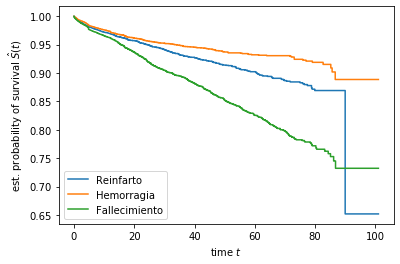

In [73]:
time, survival_prob = kaplan_meier_estimator(df["ReInfarction"], df["Months_reAMI"])
plt.step(time, survival_prob, where="post", label = 'Reinfarto')
time, survival_prob = kaplan_meier_estimator(df["Bleeding"], df["Months_Bleeding"])
plt.step(time, survival_prob, where="post", label = 'Hemorragia')
time, survival_prob = kaplan_meier_estimator(df["Death"], df["Months_Death"])
plt.step(time, survival_prob, where="post", label = 'Fallecimiento')
# plt.xlim([0,24])
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

plt.legend(loc="lower left", fontsize = 10)
plt.savefig('supervivencia.png')

---
---
# 4. Tablas de frecuencias

 Esta parte se realizará despues de hacer el preprocesado de los datos.

In [74]:
# Import data

df = pd.read_csv('../../data/PACS_DAPT_preprocess.csv')
df = df.drop('Unnamed: 0', axis=1)

In [75]:
Train = df.loc[(df.Registro == 'BLEEMACS')|(df.Registro == 'RENAMI'), ].copy()
Test = df.loc[(df.Registro == 'Vigo_Arritxaca'), ].copy()

In [76]:
print('Pacientes con ReAMI antes de los 12 meses',
     '\n-------------------------------------------------------',
     '\nConjunto de entrenamiento:',
     '\n- Sí:', Train.loc[(Train['reAMIless12Dapt'] == 1) , 'Id'].count(),
     '\n- No:', Train.loc[(Train['reAMIless12Dapt'] == 0) , 'Id'].count(),
     '\n-------------------------------------------------------',
     '\nConjunto de validación:',
     '\n- Sí:', Test.loc[(Test['reAMIless12Dapt'] == 1) , 'Id'].count(),
     '\n- No:', Test.loc[(Test['reAMIless12Dapt'] == 0) , 'Id'].count())

Pacientes con ReAMI antes de los 12 meses 
------------------------------------------------------- 
Conjunto de entrenamiento: 
- Sí: 542 
- No: 19244 
------------------------------------------------------- 
Conjunto de validación: 
- Sí: 141 
- No: 6149


In [77]:
print('Pacientes con ReAMI antes de los 12 meses',
     '\n-------------------------------------------------------',
     '\nConjunto de entrenamiento:',
     '\n', Train['reAMIless12Dapt'].value_counts(normalize=True) * 100,
     '\n-------------------------------------------------------',
     '\nConjunto de validación:',
     '\n', Test['reAMIless12Dapt'].value_counts(normalize=True) * 100)

Pacientes con ReAMI antes de los 12 meses 
------------------------------------------------------- 
Conjunto de entrenamiento: 
 0    97.260689
1     2.739311
Name: reAMIless12Dapt, dtype: float64 
------------------------------------------------------- 
Conjunto de validación: 
 0    97.758347
1     2.241653
Name: reAMIless12Dapt, dtype: float64


In [78]:
print('Pacientes con hemorragia antes de los 12 meses',
     '\n-------------------------------------------------------',
     '\nConjunto de entrenamiento:',
     '\n- Sí:', Train.loc[(Train['bleedingless12Dapt'] == 1) , 'Id'].count(),
     '\n- No:', Train.loc[(Train['bleedingless12Dapt'] == 0) , 'Id'].count(),
     '\n-------------------------------------------------------',
     '\nConjunto de validación:',
     '\n- Sí:', Test.loc[(Test['bleedingless12Dapt'] == 1) , 'Id'].count(),
     '\n- No:', Test.loc[(Test['bleedingless12Dapt'] == 0) , 'Id'].count())

Pacientes con hemorragia antes de los 12 meses 
------------------------------------------------------- 
Conjunto de entrenamiento: 
- Sí: 510 
- No: 19276 
------------------------------------------------------- 
Conjunto de validación: 
- Sí: 123 
- No: 6167


In [79]:
print('Pacientes con ReAMI antes de los 12 meses',
     '\n-------------------------------------------------------',
     '\nConjunto de entrenamiento:',
     '\n', Train['bleedingless12Dapt'].value_counts(normalize=True) * 100,
     '\n-------------------------------------------------------',
     '\nConjunto de validación:',
     '\n', Test['bleedingless12Dapt'].value_counts(normalize=True) * 100)

Pacientes con ReAMI antes de los 12 meses 
------------------------------------------------------- 
Conjunto de entrenamiento: 
 0    97.42242
1     2.57758
Name: bleedingless12Dapt, dtype: float64 
------------------------------------------------------- 
Conjunto de validación: 
 0    98.044515
1     1.955485
Name: bleedingless12Dapt, dtype: float64


Tabla sobre el número de reinfartos, hemorragias y muertes.

In [80]:
print('Pacientes con ReAMI antes de los 12 meses',
     '\n-------------------------------------------------------',
     '\nConjunto de entrenamiento:',
     '\n- Sí:', df.loc[(df['reAMIless12Dapt'] == 1) , 'Id'].count(),
     '\n- No:', df.loc[(df['reAMIless12Dapt'] == 0) , 'Id'].count(),
     '\n-------------------------------------------------------')

Pacientes con ReAMI antes de los 12 meses 
------------------------------------------------------- 
Conjunto de entrenamiento: 
- Sí: 683 
- No: 25393 
-------------------------------------------------------


In [81]:
print('Pacientes con ReAMI antes de los 12 meses',
     '\n-------------------------------------------------------',
     '\nConjunto de entrenamiento:',
     '\n', df['reAMIless12Dapt'].value_counts(normalize=True) * 100,
     '\n-------------------------------------------------------')

Pacientes con ReAMI antes de los 12 meses 
------------------------------------------------------- 
Conjunto de entrenamiento: 
 0    97.380733
1     2.619267
Name: reAMIless12Dapt, dtype: float64 
-------------------------------------------------------


In [82]:
print('Pacientes con hemorragia antes de los 12 meses',
     '\n-------------------------------------------------------',
     '\nConjunto de entrenamiento:',
     '\n- Sí:', df.loc[(df['bleedingless12Dapt'] == 1) , 'Id'].count(),
     '\n- No:', df.loc[(df['bleedingless12Dapt'] == 0) , 'Id'].count(),
     '\n-------------------------------------------------------')

Pacientes con hemorragia antes de los 12 meses 
------------------------------------------------------- 
Conjunto de entrenamiento: 
- Sí: 633 
- No: 25443 
-------------------------------------------------------


In [83]:
print('Pacientes con ReAMI antes de los 12 meses',
     '\n-------------------------------------------------------',
     '\nConjunto de entrenamiento:',
     '\n', df['bleedingless12Dapt'].value_counts(normalize=True) * 100,
     '\n-------------------------------------------------------')

Pacientes con ReAMI antes de los 12 meses 
------------------------------------------------------- 
Conjunto de entrenamiento: 
 0    97.57248
1     2.42752
Name: bleedingless12Dapt, dtype: float64 
-------------------------------------------------------


In [84]:
print('Pacientes con muerte antes de los 12 meses',
     '\n-------------------------------------------------------',
     '\nConjunto de entrenamiento:',
     '\n- Sí:', df.loc[(df['Death'] == 1) & (df['Months_Death'] <= 12), 'Id'].count(),
     '\n- Porcentaje: ', df.loc[(df['Death'] == 1) & (df['Months_Death'] <= 12), 'Id'].count() * 100 / 26076,
     '\n-------------------------------------------------------')

Pacientes con muerte antes de los 12 meses 
------------------------------------------------------- 
Conjunto de entrenamiento: 
- Sí: 968 
- Porcentaje:  3.712225801503298 
-------------------------------------------------------


In [85]:
print('Pacientes con muerte Hemorragia antes de los 12 meses',
     '\n-------------------------------------------------------',
     '\nConjunto de entrenamiento:',
     '\n- Sí:', df.loc[(df['Death'] == 1) & (df['Months_Death'] <= 12) & (df['bleedingless12Dapt'] == 1), 'Id'].count(),
     '\n- Porcentaje: ', df.loc[(df['Death'] == 1) & (df['Months_Death'] <= 12) & (df['bleedingless12Dapt'] == 1), 'Id'].count()*100/633,
     '\n-------------------------------------------------------')

Pacientes con muerte Hemorragia antes de los 12 meses 
------------------------------------------------------- 
Conjunto de entrenamiento: 
- Sí: 94 
- Porcentaje:  14.849921011058452 
-------------------------------------------------------


In [86]:
print('Pacientes con muerte Hemorragia antes de los 12 meses',
     '\n-------------------------------------------------------',
     '\nConjunto de entrenamiento:',
     '\n- Sí:', df.loc[(df['Death'] == 1) & (df['Months_Death'] <= 12) & (df['reAMIless12Dapt'] == 1), 'Id'].count(),
     '\n- Porcentaje: ', df.loc[(df['Death'] == 1) & (df['Months_Death'] <= 12) & (df['reAMIless12Dapt'] == 1), 'Id'].count() * 100 / 683,
     '\n-------------------------------------------------------')

Pacientes con muerte Hemorragia antes de los 12 meses 
------------------------------------------------------- 
Conjunto de entrenamiento: 
- Sí: 154 
- Porcentaje:  22.547584187408493 
-------------------------------------------------------
